<a href="https://colab.research.google.com/github/hongz01/Databricks-Certified-Data-Engineer-Associate-Preparaton-By-Derar/blob/main/Microsoft_Stock_Forecasting_with_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# If you want the exact same dataset as the YouTube video,
# use this link: https://drive.google.com/file/d/1WLm1AEYgU28Nk4lY4zNkGPSctdImbhJI/view?usp=sharing

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [127]:
start = '2000-03-01'
end = '2023-12-31'
df = yf.download('GTLS', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-07-26,15.00,15.20,14.75,15.20,15.20,4702600
2006-07-27,15.23,15.23,15.00,15.05,15.05,365600
2006-07-28,15.05,15.15,15.00,15.10,15.10,424900
2006-07-31,15.24,15.57,15.10,15.40,15.40,313700
2006-08-01,15.08,16.01,15.08,16.00,16.00,398600


In [128]:
df.shape

(4312, 6)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4312 entries, 2006-07-26 to 2023-09-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4312 non-null   float64
 1   High       4312 non-null   float64
 2   Low        4312 non-null   float64
 3   Close      4312 non-null   float64
 4   Adj Close  4312 non-null   float64
 5   Volume     4312 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 235.8 KB


In [130]:
# The reason you don't see "Date" as a separate column in the DataFrame when you run df.info() is because the "Date" is usually set as the index of the DataFrame when you use the yf.download function from the yfinance library.
# In this case, "Date" is not treated as a regular column but as the index for the DataFrame
df.index

DatetimeIndex(['2006-07-26', '2006-07-27', '2006-07-28', '2006-07-31',
               '2006-08-01', '2006-08-02', '2006-08-03', '2006-08-04',
               '2006-08-07', '2006-08-08',
               ...
               '2023-08-29', '2023-08-30', '2023-08-31', '2023-09-01',
               '2023-09-05', '2023-09-06', '2023-09-07', '2023-09-08',
               '2023-09-11', '2023-09-12'],
              dtype='datetime64[ns]', name='Date', length=4312, freq=None)

In [131]:
# If you want to have "Date" as a regular column in the DataFrame, you can reset the index of the DataFrame like this:
df.reset_index(inplace = True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4312 non-null   datetime64[ns]
 1   Open       4312 non-null   float64       
 2   High       4312 non-null   float64       
 3   Low        4312 non-null   float64       
 4   Close      4312 non-null   float64       
 5   Adj Close  4312 non-null   float64       
 6   Volume     4312 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 235.9 KB


In [108]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [133]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2006-07-26,15.200000
1,2006-07-27,15.050000
2,2006-07-28,15.100000
3,2006-07-31,15.400000
4,2006-08-01,16.000000
...,...,...
4307,2023-09-06,179.339996
4308,2023-09-07,176.970001
4309,2023-09-08,174.610001
4310,2023-09-11,175.190002


In [134]:
df['Date']

0      2006-07-26
1      2006-07-27
2      2006-07-28
3      2006-07-31
4      2006-08-01
          ...    
4307   2023-09-06
4308   2023-09-07
4309   2023-09-08
4310   2023-09-11
4311   2023-09-12
Name: Date, Length: 4312, dtype: datetime64[ns]

In [135]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [136]:
df

,Date,Close
0,2006-07-26,15.200000
1,2006-07-27,15.050000
2,2006-07-28,15.100000
3,2006-07-31,15.400000
4,2006-08-01,16.000000
...,...,...
4307,2023-09-06,179.339996
4308,2023-09-07,176.970001
4309,2023-09-08,174.610001
4310,2023-09-11,175.190002


In [113]:
#df['Date'] = df['Date'].apply(str_to_datetime)
#df['Date']

In [137]:
df.index = df.pop('Date')
df

,Close
Date,
2006-07-26,15.200000
2006-07-27,15.050000
2006-07-28,15.100000
2006-07-31,15.400000
2006-08-01,16.000000
...,...
2023-09-06,179.339996
2023-09-07,176.970001
2023-09-08,174.610001


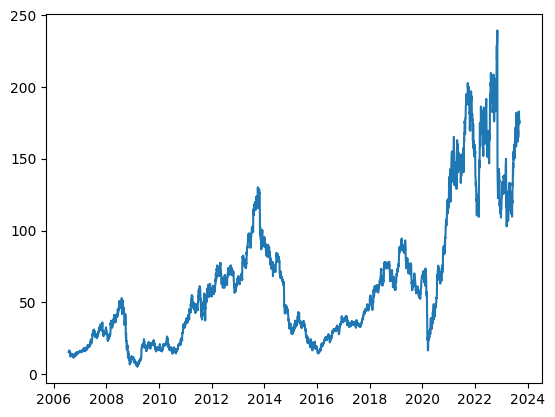

In [138]:
plt.plot(df.index, df['Close'])

In [139]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,144.679993,134.949997,131.580002,132.869995
1,2021-03-26,134.949997,131.580002,132.869995,139.339996
2,2021-03-29,131.580002,132.869995,139.339996,132.199997
3,2021-03-30,132.869995,139.339996,132.199997,138.070007
4,2021-03-31,139.339996,132.199997,138.070007,142.350006
...,...,...,...,...,...
247,2022-03-17,163.679993,158.779999,162.789993,168.750000
248,2022-03-18,158.779999,162.789993,168.750000,170.330002
249,2022-03-21,162.789993,168.750000,170.330002,169.809998
250,2022-03-22,168.750000,170.330002,169.809998,171.240005


In [140]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

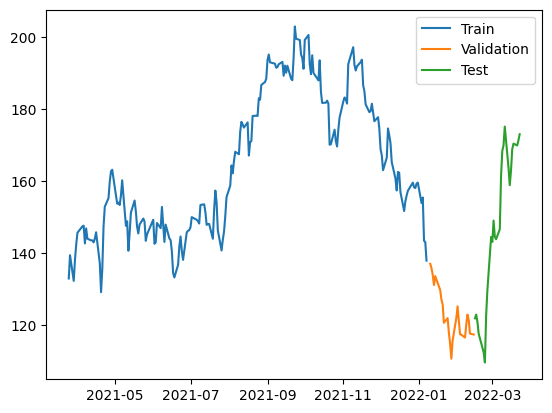

In [141]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 106ms/step - loss: 27433.0879 - mean_absolute_error: 164.4902 - val_loss: 15178.6689 - val_mean_absolute_error: 123.0035
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 27315.7480 - mean_absolute_error: 164.1317 - val_loss: 15102.4541 - val_mean_absolute_error: 122.6933
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 27220.1816 - mean_absolute_error: 163.8406 - val_loss: 15034.6680 - val_mean_absolute_error: 122.4166
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 27127.9609 - mean_absolute_error: 163.5586 - val_loss: 14960.0840 - val_mean_absolute_error: 122.1117
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 27018.6523 - mean_absolute_error: 163.2239 - val_loss: 14856.1875 - val_mean_absolute_error: 121.6854
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 26857.1465 - mean_absolute_error: 162.7313 - val_loss: 14

7/7 [==============================] - 0s 3ms/step


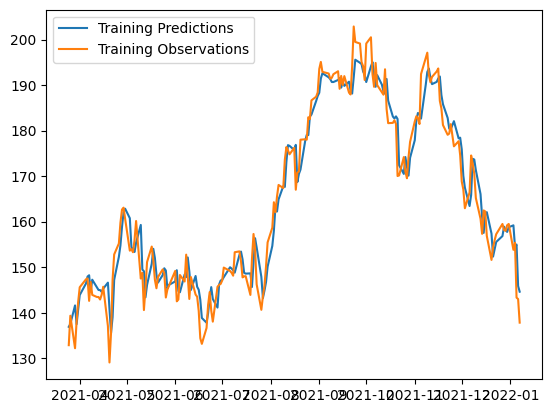

In [143]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 22ms/step


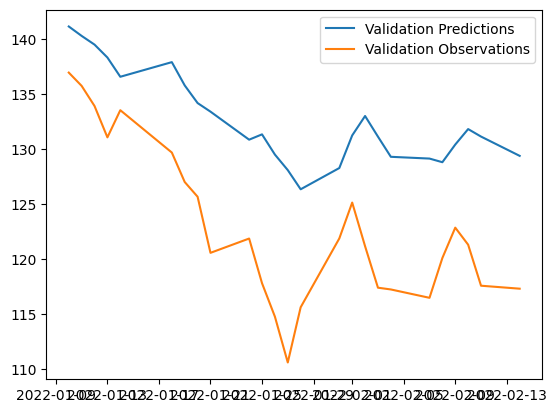

In [144]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 24ms/step


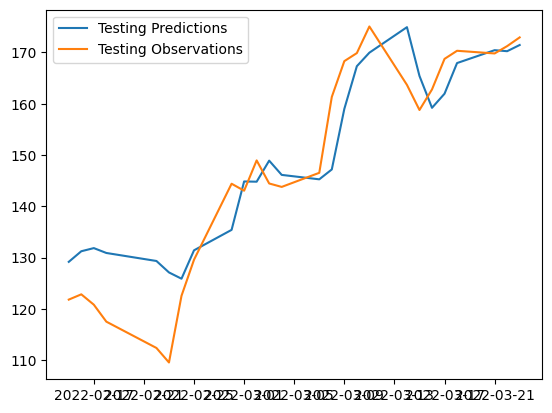

In [145]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

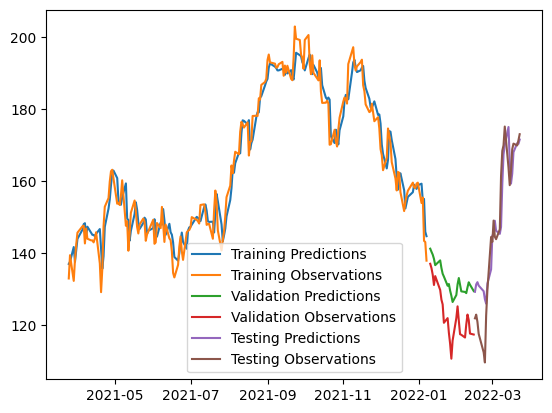

In [146]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [147]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 51ms/step


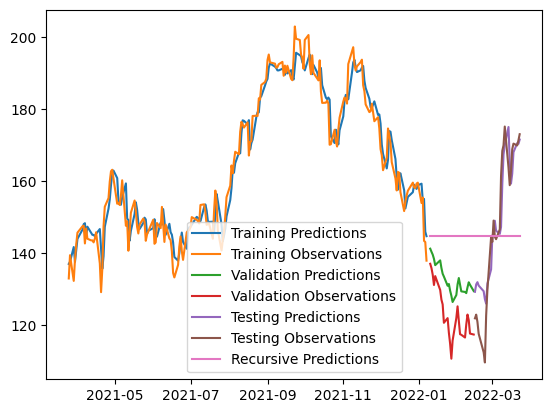

In [148]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])